### LangGraph Project sample

Ref: https://langchain-ai.github.io/langgraph/concepts/why-langgraph/

In [1]:
def function1(input):
    print("Function 1 called with input:", input)
    return "test"

In [2]:
def function2(input):
    print("Function 2 called with input:", input)

In [3]:
from langgraph.graph import Graph

workflow = Graph()

In [4]:
workflow.add_node("function1", function1)
workflow.add_node("function2", function2)
workflow.set_entry_point("function1")
workflow.add_edge("function1", "function2")
workflow.set_finish_point("function2")

In [5]:
app = workflow.compile()
app.get_graph()

Graph(nodes={'function1': Node(id='function1', name='function1', data=function1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'function2': Node(id='function2', name='function2', data=function2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='function1', data=None, conditional=False), Edge(source='function1', target='function2', data=None, conditional=False), Edge(source='function2', target='__end__', data=None, conditional=False)])

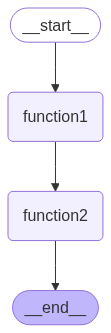

In [8]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
app.invoke("Hello World")

Function 1 called with input: Hello World
Function 2 called with input: test


In [9]:
for output in app.stream("This is a test input"):
    print("Output:", output)

Function 1 called with input: This is a test input
Output: {'function1': 'test'}
Function 2 called with input: test
Output: {'function2': None}
